In [30]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read CSVs
I'm combining multiple CSVs that scraped Bayut website at different times

In [31]:
csvs= glob.glob("*.csv")
csvs.remove('properties_dubai_furnished=all_simple.csv')
csvs.remove('properties_cleaned_engineered.csv')
csvs

['properties_dubai_furnished=all_2022-11-20 20:03:38.csv',
 'properties_dubai_furnished=all_2022-11-19 06:15:57.csv',
 'properties_dubai_furnished=all_2022-11-19 07:19:22.csv',
 'properties_dubai_furnished=all_2022-11-19 02:22:30.csv',
 'properties_dubai_furnished=all_2022-11-19 05:36:05.csv',
 'properties_dubai_furnished=all_2022-11-19 06:17:58.csv']

In [32]:
dfs = [pd.read_csv(i) for i in csvs]
for i,df in enumerate(dfs):
    print(f"Dataframe {i+1} has {len(df)} rows.\n")

Dataframe 1 has 36576 rows.

Dataframe 2 has 38215 rows.

Dataframe 3 has 38359 rows.

Dataframe 4 has 38325 rows.

Dataframe 5 has 38335 rows.

Dataframe 6 has 38335 rows.



#### Combine all dataframes into one, and drop any duplicates

In [33]:
df = pd.concat(dfs)
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,"1,295 sqft","160,000","Ashjar, Al Barari, Dubai",Apartment,Ground Floor | Available Now | 1 Bedroom,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
1,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month",Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
2,1,2,864 sqft,"72,999","Mag 218 Tower, Dubai Marina, Dubai",Apartment,BEST PRICE | UNFURNISHED | LOW FLOOR,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
3,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
4,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
...,...,...,...,...,...,...,...,...,...
38330,1,1,784 sqft,"39,999","Muhaisnah 4, Muhaisnah, Dubai",Apartment,Ready To Move | Pay Monthly | 24x7 Call Centre,wasl ivoryDED# 619683,-1
38331,5,6,"7,000 sqft","220,000","Jumeirah 3, Jumeirah, Dubai",Villa,Beautifully maintained: 5 b/r semi-independent...,wasl ivoryDED# 619683,-1
38332,5,6,"15,000 sqft","220,000","Al Barsha 2, Al Barsha, Dubai",Villa,Private swimming pool and stunning landscaped ...,wasl ivoryDED# 619683,-1
38333,2,2,"1,100 sqft","68,000","Sheikh Hamdan Colony, Al Karama, Dubai",Apartment,Spacious 2 BHK for family in Al Karama,wasl ivoryDED# 619683,-1


In [34]:
df = df.drop_duplicates()
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,"1,295 sqft","160,000","Ashjar, Al Barari, Dubai",Apartment,Ground Floor | Available Now | 1 Bedroom,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
1,1,2,883 sqft,"77,990","Loreto 3B, Loreto B, Loreto, DAMAC Hills, Dubai",Apartment,"Brand New Furniture Vacant | 8,000AED / Month",Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
2,1,2,864 sqft,"72,999","Mag 218 Tower, Dubai Marina, Dubai",Apartment,BEST PRICE | UNFURNISHED | LOW FLOOR,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
3,2,3,"8,425 sqft","200,000","Nakheel Villas, Jumeirah Village Circle (JVC),...",Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
4,2,2,"1,200 sqft","60,000","Rose 1 Building, Al Mankhool, Bur Dubai, Dubai",Apartment,Family Building Well Maintained 2BHK Apartment...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
...,...,...,...,...,...,...,...,...,...
38203,4,4,"2,387 sqft","265,000","Maple At Dubai Hills Estate 2, Maple at Dubai ...",Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38204,1,1,800 sqft,"33,000","Al Warqaa, Dubai",Apartment,SPACIOUS 1BHK ONE MONTH FREE GYM POOL PARKING ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,"7,437 sqft","700,000","Golf Place I, Golf Place, Dubai Hills Estate, ...",Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450 sqft,"28,000","Hor Al Anz, Deira, Dubai",Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


#### Let's remove the rows without area and price

In [35]:
df = df.drop(index=df[df.area == '-1'].index)
df = df.drop(index=df[df.prices == '-1'].index)
print(len(df))

196291


In [36]:
df['bedrooms'].value_counts()

1         59787
2         57596
3         28406
Studio    23347
4         11747
5         10935
6          2665
7           890
8           462
10          144
9           135
12           71
21           28
11           24
16           13
14           11
18            8
13            7
17            6
15            5
20            4
Name: bedrooms, dtype: int64

Seems like there's a few properties with >7 bedrooms, which is a bit odd.. Let's investigate

In [37]:
df['property_types'].value_counts()

Apartment               156709
Villa                    30906
Townhouse                 6116
Hotel Apartment           1694
Penthouse                  752
Residential Floor           46
Villa Compound              44
Residential Building        24
Name: property_types, dtype: int64

Ok there it is, some listings are actual entire buildings (and residential floors?) ! I'm not interested in those, so let's remove them..

In [38]:
df = df.drop(index=df[df.property_types == 'Residential Building'].index)
df = df.drop(index=df[df.property_types == 'Residential Floor'].index)

len(df)

195900

Let's now see if the # bedrooms look plausible:

In [53]:
df.bedrooms.value_counts()

1     59674
2     57468
3     28353
0     23309
4     11726
5     10926
6      2664
7       887
8       462
10      144
9       135
12       67
11       24
16       13
21       13
14       11
18        8
13        7
15        5
20        4
Name: bedrooms, dtype: int64

Hmmm I'm still a bit suspicious about those properties with so many bedrooms (>7).. They seem to only constitute 893 properties which is a small fraction. I'm gonna go ahead and remove these, as they are potential outliers..

In [61]:
df = df.drop(index=df[df.bedrooms > 7].index)
len(df)

191055

Also, let's just assign property types with values "Villa Compounds" to simply "Villa"

In [44]:
df.loc[df.property_types == 'Villa Compound', 'property_types'] = 'Villa'
len(df)

195900

Let's clean up the columns, for locations, we are only interested in the neighborhood. Let's assign 0 for studios to keep it numerical, and remove the commas in pricing and area (again to keep it numerical).

In [68]:
df.locations = df.locations.apply(lambda x: x.split(',')[-2].strip())
df.bedrooms = df.bedrooms.apply(lambda x: '0' if x=='Studio' else x)
df.prices = df.prices.apply(lambda x: x.replace(',',''))
df.area = df.area.apply(lambda x: x.replace('sqft','').replace(',',''))

IndexError: list index out of range

In [ ]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.prices = df.prices.astype(float)
df.area = df.area.astype(float)

In [69]:
df

,bedrooms,bathrooms,area,prices,locations,property_types,property_keywords,description,amenities
0,1,2,1295.0,160000.0,Al Barari,Apartment,Ground Floor | Available Now | 1 Bedroom,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
1,1,2,883.0,77990.0,DAMAC Hills,Apartment,"Brand New Furniture Vacant | 8,000AED / Month",Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
2,1,2,864.0,72999.0,Dubai Marina,Apartment,BEST PRICE | UNFURNISHED | LOW FLOOR,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
3,2,3,8425.0,200000.0,Jumeirah Village Circle (JVC),Villa,2BR+ Maid Room | Upgraded Interior with Turkis...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
4,2,2,1200.0,60000.0,Bur Dubai,Apartment,Family Building Well Maintained 2BHK Apartment...,Brand new one bedroom apartment in The Neighbo...,Balcony or Terrace
...,...,...,...,...,...,...,...,...,...
38202,3,3,3200.0,100000.0,Mirdif,Villa,3 bedroom hall compound villa in mirdif rent...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38203,4,4,2387.0,265000.0,Dubai Hills Estate,Villa,3M | CLOSE TO POOL | GREEN BELT | COMING UP SOON,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38205,4,5,7437.0,700000.0,Dubai Hills Estate,Villa,Brand New 4 Bedroom Villa for Rent,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1
38206,1,1,450.0,28000.0,Deira,Apartment,1BEDROOM HALL FLAT W/AC FAMILY ONLY AVAILABLE ...,ALSO AVAILABLE FOR SHORT TERM RENT. White and ...,-1


Cool! Let's checkout the locations:

In [50]:
sorted(list(df.locations.value_counts().keys()))

['Academic City',
 'Al Awir',
 'Al Badaa',
 'Al Barari',
 'Al Barsha',
 'Al Furjan',
 'Al Garhoud',
 'Al Hudaiba',
 'Al Jaddaf',
 'Al Jafiliya',
 'Al Karama',
 'Al Khawaneej',
 'Al Lisaili',
 'Al Mamzar',
 'Al Manara',
 'Al Mina',
 'Al Mizhar',
 'Al Nahda (Dubai)',
 'Al Quoz',
 'Al Qusais',
 'Al Rashidiya',
 'Al Safa',
 'Al Satwa',
 'Al Sufouh',
 'Al Twar',
 'Al Warqaa',
 'Al Warsan',
 'Al Wasl',
 'Arabian Ranches',
 'Arabian Ranches 2',
 'Arabian Ranches 3',
 'Arjan',
 'Barsha Heights (Tecom)',
 'Bluewaters Island',
 'Bukadra',
 'Bur Dubai',
 'Business Bay',
 'City of Arabia',
 'Culture Village',
 'DAMAC Hills',
 'DAMAC Hills 2 (Akoya by DAMAC)',
 'DIFC',
 'Damac Lagoons',
 'Deira',
 'Deira Island',
 'Discovery Gardens',
 'Downtown Dubai',
 'Downtown Jebel Ali',
 'Dubai Festival City',
 'Dubai Harbour',
 'Dubai Hills Estate',
 'Dubai Industrial Park',
 'Dubai Internet City',
 'Dubai Investment Park (DIP)',
 'Dubai Marina',
 'Dubai Maritime City',
 'Dubai Media City',
 'Dubai Productio

<AxesSubplot: >

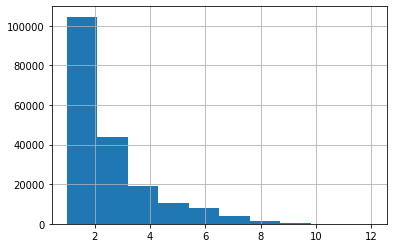

In [70]:
df.bathrooms.hist()

<AxesSubplot: >

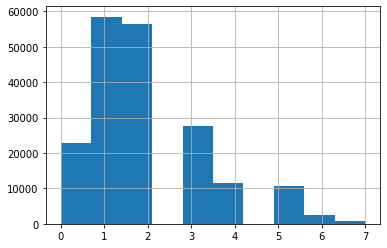

In [71]:
df.bedrooms.hist()

In [72]:
df.locations.value_counts()

Jumeirah Village Circle (JVC)    16652
Downtown Dubai                   10889
Bur Dubai                        10653
Dubai Marina                      9964
Business Bay                      8525
                                 ...  
Damac Lagoons                        5
Nad Shamma                           4
Deira Island                         3
The World Islands                    3
Palm Jebel Ali                       2
Name: locations, Length: 119, dtype: int64

In [73]:
df.property_types.value_counts()

Apartment          153273
Villa               29421
Townhouse            5965
Hotel Apartment      1657
Penthouse             739
Name: property_types, dtype: int64

In [74]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
       'property_types', 'property_keywords', 'description', 'amenities'],
      dtype='object')

In [75]:
corr_matrix = df[['bedrooms','bathrooms','area','prices']].corr()
corr_matrix

,bedrooms,bathrooms,area,prices
bedrooms,1.000000,0.920329,0.614776,0.247076
bathrooms,0.920329,1.000000,0.623067,0.252485
area,0.614776,0.623067,1.000000,0.215893
prices,0.247076,0.252485,0.215893,1.000000


<AxesSubplot: >

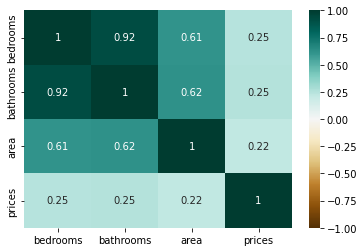

In [76]:
sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True,cmap='BrBG')

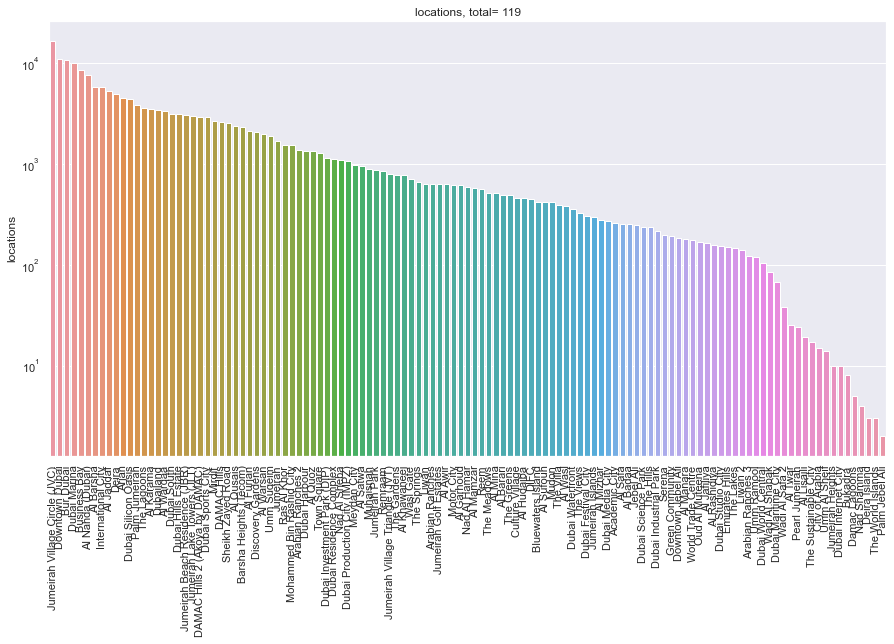

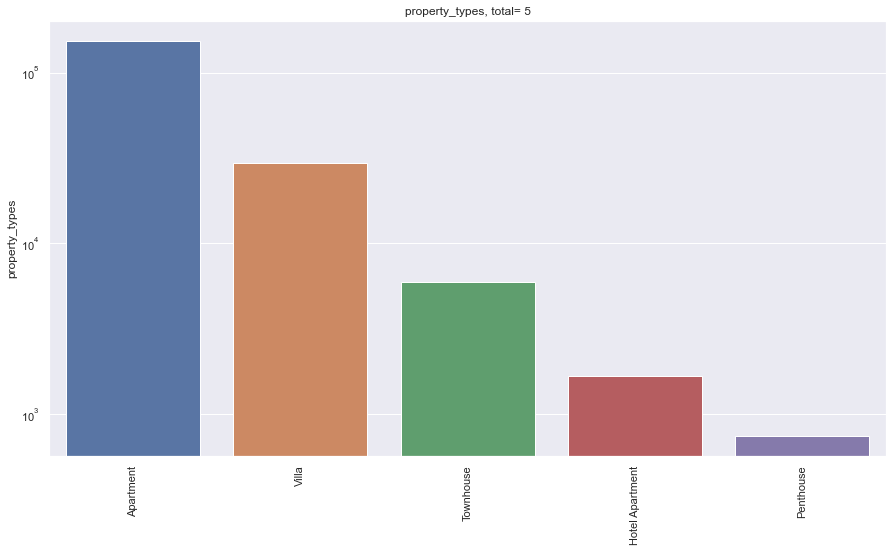

In [77]:
sns.set(rc = {'figure.figsize':(15,8)})
df_cat = df[['locations','property_types']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    chart.set_yscale('log')
    chart.set(title=f"{i}, total= {len(cat_num)}")
    plt.show()

# Feature Engineering

### Pool

In [78]:
df['pool'] = df.apply(lambda x: 1 if 'pool' in x.description.lower() or 'pool' in x.amenities.lower() or 'pool' in x.property_keywords.lower() else 0  ,axis=1)

In [79]:
df.pool.value_counts()

1    146263
0     44792
Name: pool, dtype: int64

### Balcony

In [80]:
df['balcony'] = df.apply(lambda x: 1 
                         if 'balcony' in x.description.lower() or 'terrace' in x.description.lower()
                         or 'balcony' in x.amenities.lower()  or 'terrace' in x.amenities.lower()
                         or 'balcony' in x.property_keywords.lower() or 'terrace' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.balcony.value_counts()


1    146835
0     44220
Name: balcony, dtype: int64

### Furnished

In [81]:
df['furnished'] = df.apply(lambda x: 1 
                         if 'furnished' in x.description.lower() 
                         or 'furnished' in x.amenities.lower() 
                         or 'furnished' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    105954
1     85101
Name: furnished, dtype: int64

### Maid's room

In [82]:
df['maid'] = df.apply(lambda x: 1 
                         if 'maid' in x.description.lower() 
                         or 'maid' in x.amenities.lower() 
                         or 'maid' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.furnished.value_counts()


0    105954
1     85101
Name: furnished, dtype: int64

### Gym

In [83]:
df['gym'] = df.apply(lambda x: 1 
                         if 'gym' in x.description.lower() or 'fitness' in x.description.lower() or 'gymnasium' in x.description.lower() 
                         or 'gym' in x.amenities.lower() or 'fitness' in x.amenities.lower() or 'gymnasium' in x.amenities.lower() 
                         or 'gym' in x.property_keywords.lower() or 'fitness' in x.property_keywords.lower() or 'gymnasium' in x.property_keywords.lower() 
                         else 0  ,axis=1)
df.gym.value_counts()

1    143668
0     47387
Name: gym, dtype: int64

### Brand New

In [84]:
df['brand_new'] = df.apply(lambda x: 1 
                         if 'brand new' in x.description.lower()
                         or 'brand new' in x.amenities.lower() 
                         or 'brand new' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.brand_new.value_counts()

0    142436
1     48619
Name: brand_new, dtype: int64

### Burj Khalifa View

In [85]:
df['burj_view'] = df.apply(lambda x: 1 
                         if ('burj khalifa' in x.description.lower() and 'view' in x.description.lower())
                         or ('burj khalifa' in x.amenities.lower()  and 'view' in x.amenities.lower())
                         or ('burj khalifa' in x.property_keywords.lower() and 'view' in x.property_keywords.lower())
                         else 0  ,axis=1)
df.burj_view.value_counts()

0    173854
1     17201
Name: burj_view, dtype: int64

### Sea View

In [86]:
df['sea_view'] = df.apply(lambda x: 1 
                         if 'sea view' in x.description.lower() 
                         or 'sea view' in x.amenities.lower()
                         or 'sea view' in x.property_keywords.lower()
                         else 0  ,axis=1)
df.sea_view.value_counts()

0    178305
1     12750
Name: sea_view, dtype: int64

### At beach or proximity to beach

In [87]:
df['beach'] = df.apply(lambda x: 1 
                         if 'beach'in x.description.lower()
                         or 'beach'  in x.amenities.lower() 
                         or 'beach'  in x.property_keywords.lower()
                         else 0  ,axis=1)
df.beach.value_counts()

0    172412
1     18643
Name: beach, dtype: int64

### Removing some outliers

In [88]:
print(f"So far, we have {len(df)} observations.")

So far, we have 191055 observations.


In [89]:
df['price_per_sqft'] = df['prices']/df['area']

In [90]:
df.price_per_sqft.describe()

count    191055.000000
mean         87.838157
std         414.332890
min           0.999987
25%          48.000000
50%          65.376569
75%         100.799680
max       59426.229508
Name: price_per_sqft, dtype: float64

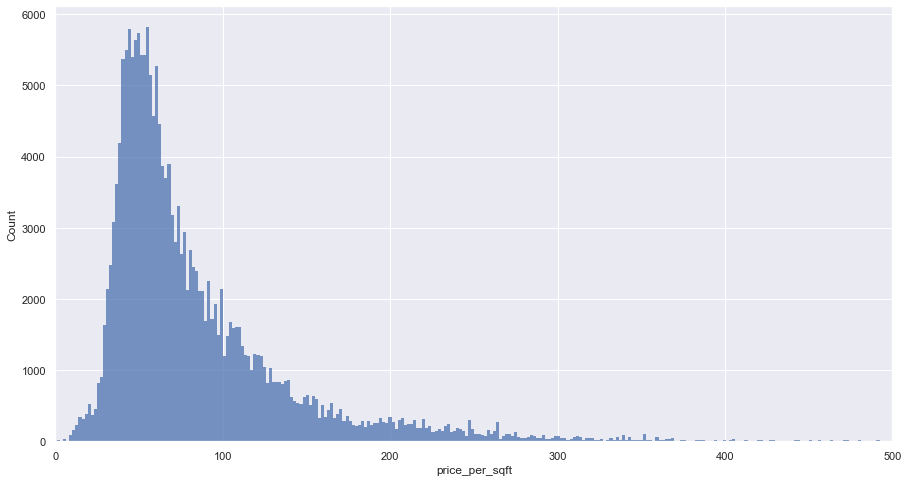

In [91]:
fig, ax = plt.subplots()
sns.histplot(df.price_per_sqft)
ax.set_xlim(0,500)
plt.show()

In [92]:
# Source: https://www.youtube.com/watch?v=cbqZa_1vzcg&list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg&index=4&ab_channel=codebasics
def remove_price_persqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locations'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [93]:
df = remove_price_persqft_outliers(df)
print(f"Now we have {len(df)} observations.")

Now we have 157380 observations.


In [94]:
df_final = df[['bedrooms', 'bathrooms', 'area', 'prices', 'locations',
               'property_types','pool', 'balcony', 'furnished', 'maid', 'gym', 'brand_new', 'burj_view',
               'sea_view', 'beach']]
df_final

,bedrooms,bathrooms,area,prices,locations,property_types,pool,balcony,furnished,maid,gym,brand_new,burj_view,sea_view,beach
0,0,1,352.0,21500.0,Academic City,Apartment,1,0,0,0,1,0,0,0,0
1,0,1,400.0,21500.0,Academic City,Apartment,1,1,1,0,1,0,0,0,0
2,0,1,400.0,21500.0,Academic City,Apartment,0,0,1,0,0,0,0,0,0
3,0,1,410.0,21500.0,Academic City,Apartment,1,1,1,1,1,0,1,0,0
4,0,1,390.0,20500.0,Academic City,Apartment,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157375,3,3,1806.0,152000.0,World Trade Centre,Hotel Apartment,1,1,0,0,1,0,0,0,0
157376,3,4,1806.0,152000.0,World Trade Centre,Apartment,0,1,1,0,0,0,0,0,0
157377,3,4,1806.0,152000.0,World Trade Centre,Apartment,1,1,1,0,1,0,0,0,0
157378,3,3,1806.0,152000.0,World Trade Centre,Hotel Apartment,0,1,1,0,0,0,0,0,0


In [95]:
df_final.to_csv('properties_cleaned_engineered.csv',index=False)